<a href="https://colab.research.google.com/github/SylvainGuyennon/Projet_wish/blob/main/analyse_prelim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Une entreprise de vente de prêt à porter en ligne collecte quotidiennement des données opérationnelles : nombre de ventes, notes, etc. Ils aimeraient pouvoir stocker leurs données opérationnelles de manière optimisée afin de les analyser par la suite..

Votre mission est la suivante :
* collecter le jeu de données
* faire une première analyse des données: nombre de colonnes, valeurs manquantes, cohérence des unités avec les valeurs..
* concevoir la base de données
* programmer l’import des données
* faire une analyse exploratoire des données, faire une analyse de corrélation des variables.
* proposer un programme d’intelligence artificielle adapté aux données disponibles (clustering de produit, prédictions, analyse de commentaires..)
* rédiger une documentation synthétique sur l’usage de la base de données (connexion, récupération des données, etc.) ainsi que votre programme IA.

# Exploration préliminaire des données

On ouvre naivement le csv pour explorer

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r"/content/drive/Shareddrives/MSP5 Massy - DEV IA - Accès Promo - intensif +Alt/6. Docs_Cours_Projets/groupe/SylvDy/data_lourd.csv"

In [ ]:
df = pd.read_csv(path, index_col=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72989 entries, 0 to 880
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   title                                72933 non-null  object 
 1   title_orig                           71938 non-null  object 
 2   discount_price                       71938 non-null  float64
 3   discount_price_currency              71938 non-null  object 
 4   retail_price                         71938 non-null  float64
 5   retail_price_currency                71938 non-null  object 
 6   discount_price_in_original_currency  71938 non-null  float64
 7   nb_cart_orders_approx                71938 non-null  float64
 8   nb_units_purchased_approx            0 non-null      float64
 9   uses_ad_boosts                       0 non-null      float64
 10  rating                               71938 non-null  float64
 11  rating_count                  

In [ ]:
df.describe()

,discount_price,retail_price,discount_price_in_original_currency,nb_cart_orders_approx,nb_units_purchased_approx,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,merchant_profile_picture
count,71938.000000,71938.000000,71938.000000,71938.000000,0.0,0.0,71938.000000,71938.000000,52387.000000,52387.000000,...,0.0,0.0,71938.000000,71938.000000,0.0,71938.000000,7.193800e+04,71938.000000,0.0,0.0
mean,51.606785,74.680967,60.593991,1735.718396,NaN,NaN,4.345558,390.107676,313.920095,94.341153,...,NaN,NaN,38.483653,5.364391,NaN,45.336887,1.709745e+04,4.205522,NaN,NaN
std,629.810785,651.313494,761.483277,6397.763231,NaN,NaN,0.621812,1490.942659,1021.779741,316.834453,...,NaN,NaN,19.231749,8.082663,NaN,13.306453,1.302970e+05,0.365903,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,NaN,1.000000,0.000000e+00,1.000000,NaN,NaN
25%,4.740000,6.000000,5.000000,7.000000,NaN,NaN,4.000000,0.000000,9.000000,2.000000,...,NaN,NaN,25.000000,1.000000,NaN,50.000000,3.330000e+02,4.021459,NaN,NaN
50%,10.000000,15.000000,11.000000,10.000000,NaN,NaN,4.385214,24.000000,45.000000,13.000000,...,NaN,NaN,50.000000,3.000000,NaN,50.000000,1.831500e+03,4.238152,NaN,NaN
75%,23.000000,42.000000,25.000000,1000.000000,NaN,NaN,5.000000,207.000000,219.000000,64.000000,...,NaN,NaN,50.000000,8.000000,NaN,50.000000,8.765000e+03,4.393215,NaN,NaN
max,77109.000000,77109.000000,93488.000000,100000.000000,NaN,NaN,5.000000,108553.000000,58448.000000,22520.000000,...,NaN,NaN,50.000000,395.000000,NaN,50.000000,3.464509e+06,5.000000,NaN,NaN


In [ ]:
df.isnull().sum()

title                                     56
title_orig                              1051
discount_price                          1051
discount_price_currency                 1051
retail_price                            1051
retail_price_currency                   1051
discount_price_in_original_currency     1051
nb_cart_orders_approx                   1051
nb_units_purchased_approx              72989
uses_ad_boosts                         72989
rating                                  1051
rating_count                            1051
rating_five_count                      20602
rating_four_count                      20602
rating_three_count                     20602
rating_two_count                       20602
rating_one_count                       20602
badges_count                           72989
badge_local_product                    72989
badge_product_quality                  72989
badge_fast_shipping                    72989
tags                                   72989
product_co

Un tableau d'exploration est disponible ici : https://docs.google.com/spreadsheets/d/1Lvj3OS4ZqS59qpD0FP_r8e82zoCkamO1B7v-IfcVJlk/edit

## Nettoyage des données

On peut supprimer de façon certaine : 

Les colonnes à URL : 
* product_url 
* product_picture
* merchant_profile_picture

Les colonnes qui n’ont pas d'intérêt : 
* les colonnes qui dépendent de merchant id : merchant_name, merchant_title  
* product_variation_size_id (n'apporte pas d'infos cohérantes) 
* urgency_text (toujours identique, n'apporte pas d'infos)
* merchant_title (information redondante avec dans merchant_id)
* merchant_name (information redondante avec dans merchant_id)
* merchant_info_subtitle (information contenue dans d'autres colonnes)
* shipping_option_price (contenu dans une autre colonne)
* title (traduction de title_orig)
* les colonnes rating_x_count, qui sont au final résumées dans le rating
* discount_price_currency,retail_price_currency discount_price_in_original_currency qui sont des colonnes qui apportent de l'info sur les devises mais qui n'apporte aucune info pertinente dans notre analyse.
* nb_cart_orders_approx est une colonne qui est indescriptible

Les colonnes vides :
* nb_units_purchased_approx
* badges_count                      
* badge_local_product
* badge_product_quality 
* badge_fast_shipping
* tags
* countries_shipped_to
* merchant_has_profile_picture
* uses_ad_boosts


In [ ]:
df = df.drop(["merchant_info_subtitle","shipping_option_name","urgency_text","product_variation_size_id","product_url","product_picture","merchant_profile_picture", "title", "merchant_title","merchant_name","rating_five_count","rating_four_count","rating_three_count","rating_two_count","rating_one_count", "nb_units_purchased_approx", "badges_count", "badge_local_product", "badge_product_quality", "badge_fast_shipping" , "tags", "countries_shipped_to", "merchant_has_profile_picture", "uses_ad_boosts" ], axis=1)


In [ ]:
df = df.drop(['discount_price_currency','retail_price_currency', 'discount_price_in_original_currency', 'nb_cart_orders_approx'], axis=1)

In [ ]:
df.columns

Index(['title_orig', 'discount_price', 'retail_price', 'rating',
       'rating_count', 'product_color', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'inventory_total',
       'has_urgency_banner', 'origin_country', 'merchant_rating_count',
       'merchant_rating', 'merchant_id', 'product_id'],
      dtype='object')

#### Gestion des NaN

product_color (41 missing): Remplacer par ‘SC’ Sans Couleurs

In [ ]:
df["product_color"] = df["product_color"].fillna("SC")

"has_urgency_banner" les NaN sont des Falses

In [ ]:
df["has_urgency_banner"] = df["has_urgency_banner"].fillna(False)

Le reste des NaN sont à supprimer

In [ ]:
df = df.dropna(subset=['title_orig','discount_price','retail_price',                  
'rating',                        
'rating_count' ,                  
'product_color',                    
'product_variation_inventory',    
'shipping_option_price',          
'shipping_is_express',            
'inventory_total',                
'origin_country' ,                
'merchant_rating_count',          
'merchant_rating',                
'merchant_id',                   
'product_id'])

In [ ]:
df.isnull().sum()

title_orig                     0
discount_price                 0
retail_price                   0
rating                         0
rating_count                   0
product_color                  0
product_variation_inventory    0
shipping_option_price          0
shipping_is_express            0
inventory_total                0
has_urgency_banner             0
origin_country                 0
merchant_rating_count          0
merchant_rating                0
merchant_id                    0
product_id                     0
dtype: int64

Pour ne pas brouiller les analyses, on supprime les lignes qui n'ont pas de rating. 

In [ ]:
df = df.loc[df["rating_count"]!= 0]
df = df.loc[df["merchant_rating_count"]!= 0]

## Suppression des duplicatas



In [ ]:
df.duplicated().sum()

1001

In [ ]:
df = df.drop_duplicates()

## Création de métriques

On créer une colonne pour déterminer le pourcentage de réduction appliqué à chacun des produits

In [ ]:
df['discount_amount'] = (df['retail_price'] - df['discount_price']) / df['retail_price']  * 100

In [ ]:
df.rating_count.describe()

count     31651.000000
mean        583.821585
std        1834.777939
min           1.000000
25%          19.000000
50%          87.000000
75%         414.000000
max      108553.000000
Name: rating_count, dtype: float64

Création de la colonne 'sucess' qui nous sert à définir notre target, elle exprime la popularité d'un produit. Plus l'on s'approche du 0 plus le produit est populaire.  

In [ ]:
df['sucess'] =  (df['rating'] / df['rating_count']) * 100

Pour avoir des objets significatifs, on garde uniquement les produits qui ont 10 commentaires ou plus.

In [ ]:
df = df.loc[df['rating_count'] > 10]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


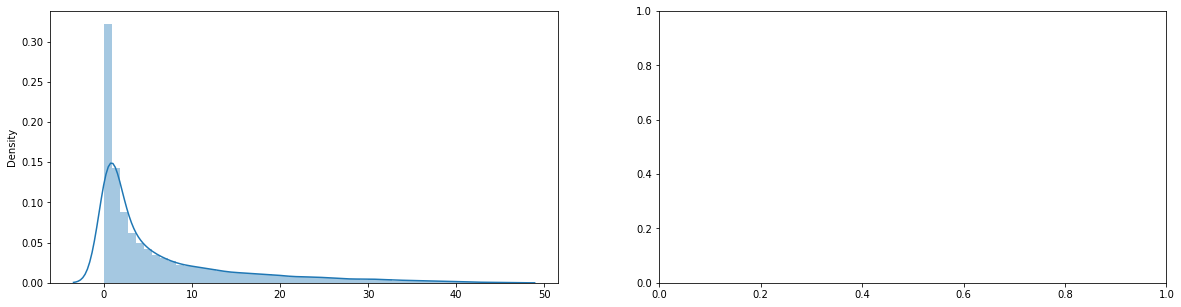

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.distplot(ax = axes[0], x = df.sucess, hist = True, kde = True)

Commence le travail de conversion des colonnes catégorielles en numériques.

In [ ]:
# Conversion des couleurs en numériques
le = preprocessing.LabelEncoder()
df['product_color'] = le.fit_transform(df['product_color'])

In [ ]:
# Conversion des booléens True / False en 0 ou 1 
df["shipping_is_express"] = df["shipping_is_express"].astype(int)
df["has_urgency_banner"] = df["has_urgency_banner"].astype(int)

In [ ]:
# Conversion des pays d'origines en numériques
df['origin_country'] = le.fit_transform(df['origin_country'])

In [ ]:
# Conversion des mechant id alphanumériques
df['merchant_id'] = le.fit_transform(df['merchant_id'])

In [ ]:
# Des produits sont en doubles, on suprrime ces doublon en gardant uniquement la première ligne  
df =df.drop_duplicates(subset='product_id', keep="first")
# Transformation des products id alphanumériques
df['product_id'] = le.fit_transform(df['product_id'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# On met l'ensemble des titres produit en lower case 

df['title_orig'] = df['title_orig'].str.lower()

Certain prix sont erronés (0), il faut les supprimer.

In [ ]:
df = df.loc[df['retail_price'] != 0]

Gestion des outliers et supprésion.

In [ ]:
numeric_col = ['rating','rating_count','shipping_option_price','inventory_total','merchant_rating_count','merchant_rating']

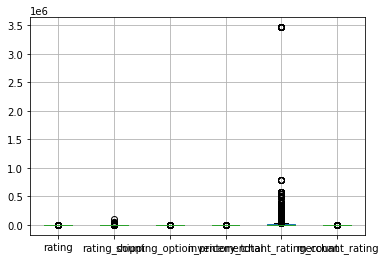

In [ ]:
df.boxplot(numeric_col)

In [ ]:
# On enregistre le nouveau dataframe dans notre compte 
new_path = r"/content/drive/Shareddrives/MSP5 Massy - DEV IA - Accès Promo - intensif +Alt/6. Docs_Cours_Projets/groupe/SylvDy/data_lourd_clean.csv"
df.to_csv(new_path, encoding='utf-8', index=False)

On peut ensuite séparer ce dataset en deux en vue de crée la BDD

In [ ]:
df_product = df.loc[:,['title_orig', 'discount_price', 'retail_price', 'rating',
       'rating_count', 'product_color', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express',"has_urgency_banner", 'inventory_total',
       'merchant_id', 'product_id', 'discount_amount', 'sucess']]

df_merch = df.loc[:,['merchant_id', 'origin_country', 'merchant_rating_count', 'merchant_rating']]

df_merch.drop_duplicates(inplace=True)

df_product.to_csv(r"/content/drive/Shareddrives/MSP5 Massy - DEV IA - Accès Promo - intensif +Alt/6. Docs_Cours_Projets/groupe/SylvDy/product.csv", index=False)
df_merch.to_csv(r"/content/drive/Shareddrives/MSP5 Massy - DEV IA - Accès Promo - intensif +Alt/6. Docs_Cours_Projets/groupe/SylvDy/merchant.csv",index=False)

On peut récupérer les données depuis la bdd grace à l'api de dbhub.io

In [ ]:
import requests
import json

# URL /v1/query
# Run a SQLite query on a database
# Parameters (POST)
# apikey # Your API key.
# dbowner # The owner of the database
# dbname # The name of the database
# sql # The SQL query, Base64 encoded

files = {
    'apikey': (None, '2Dnf3U9w2mugDcbrWn31rxuVxSU'),
    'dbowner': (None, 's.guyennon'),
    'dbname': (None, 'db-wish.db'),
    'sql' : (None,"c2VsZWN0ICogCmZyb20gcHJvZHVjdCAKbGVmdCBqb2luIG1lcmNoYW50IG9uIHByb2R1Y3QubWVyY2hhbnRfaWQ9bWVyY2hhbnQubWVyY2hhbnRfaWQ=")
}
r = requests.post('https://api.dbhub.io/v1/query', files=files)

# La réponse est un peu encodée de façon bancale, l'API est encore en dvpmt

dic = json.loads(r.text)
df = pd.DataFrame(dic)

# on récupère les noms des colonnes

nom_col = []
for i in range(len(df.columns)) : 
    nom = df[i][0]["Name"]
    nom_col.append(nom)

df.columns = nom_col

# on récupere les valeurs de chaque case du df

for i in range(18) : 
    df.iloc[:,i] = df.iloc[:,i].apply(lambda x : x["Value"])

In [ ]:
df

,title_orig,discount_price,retail_price,rating,rating_count,product_color,product_variation_inventory,shipping_option_price,shipping_is_express,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_id,product_id,discount_amount,sucess
0,new stylish women summer beach flip flops slip...,10.00,16.0,4.204545,440.0,489,50.0,3.0,0,50.0,0,6,5179.0,4.122224,1880,517,37.500000,0.955579
1,new women fashion pants yoga pants harem pants...,10.00,68.0,4.126160,539.0,489,3.0,3.0,0,50.0,0,6,1651.0,3.965475,795,13902,85.294118,0.765521
8,new design barefoot skin shoes aqua water summ...,4.78,5.0,4.197166,1694.0,425,50.0,1.0,0,50.0,1,6,230680.0,4.350624,194,3586,4.400000,0.247767
12,men's antiskid flip-flops england tide leisure...,5.00,5.0,3.711656,163.0,76,50.0,2.0,0,50.0,0,6,8180.0,4.271394,3298,3374,0.000000,2.277090
14,ladies spring and summer korean fashion foldab...,6.00,6.0,4.342048,459.0,147,50.0,2.0,0,50.0,0,6,1394.0,4.424677,4432,3074,0.000000,0.945980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,2021 new upgrade high quality monocular 40x60 ...,15.00,28.0,4.000000,36.0,40,6.0,5.0,0,50.0,0,6,6553.0,4.005341,6755,14133,46.428571,11.111111
861,transform your phone into a professional quali...,7.00,7.0,3.920000,25.0,489,50.0,2.0,0,50.0,0,6,3836.0,4.520594,8671,13534,0.000000,15.680000
863,2.7 inch tft lcd hd 1080p 16mp 16x digital zoo...,14.00,14.0,3.476190,21.0,40,10.0,4.0,0,41.0,0,6,1091.0,4.004583,8169,7078,0.000000,16.553288
870,ai human detect 1080p wireless ptz outdoor ind...,27.00,336.0,4.350000,100.0,489,2.0,8.0,0,50.0,0,6,975.0,4.318974,10129,13341,91.964286,4.350000


On va ensuite opérer à un cut des valeurs extremes pour avoir un set de donnée plus cohérent

In [ ]:
for x in ['rating','rating_count','shipping_option_price','inventory_total','merchant_rating_count','merchant_rating']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [ ]:
df = df.dropna(axis=0)

 Visuel du taux de succès d'un produit en fonction du pourcentage de discount appliqué. On prend note que les produits qui ont le plus de succès ont un prix discount d'environ 30%. 

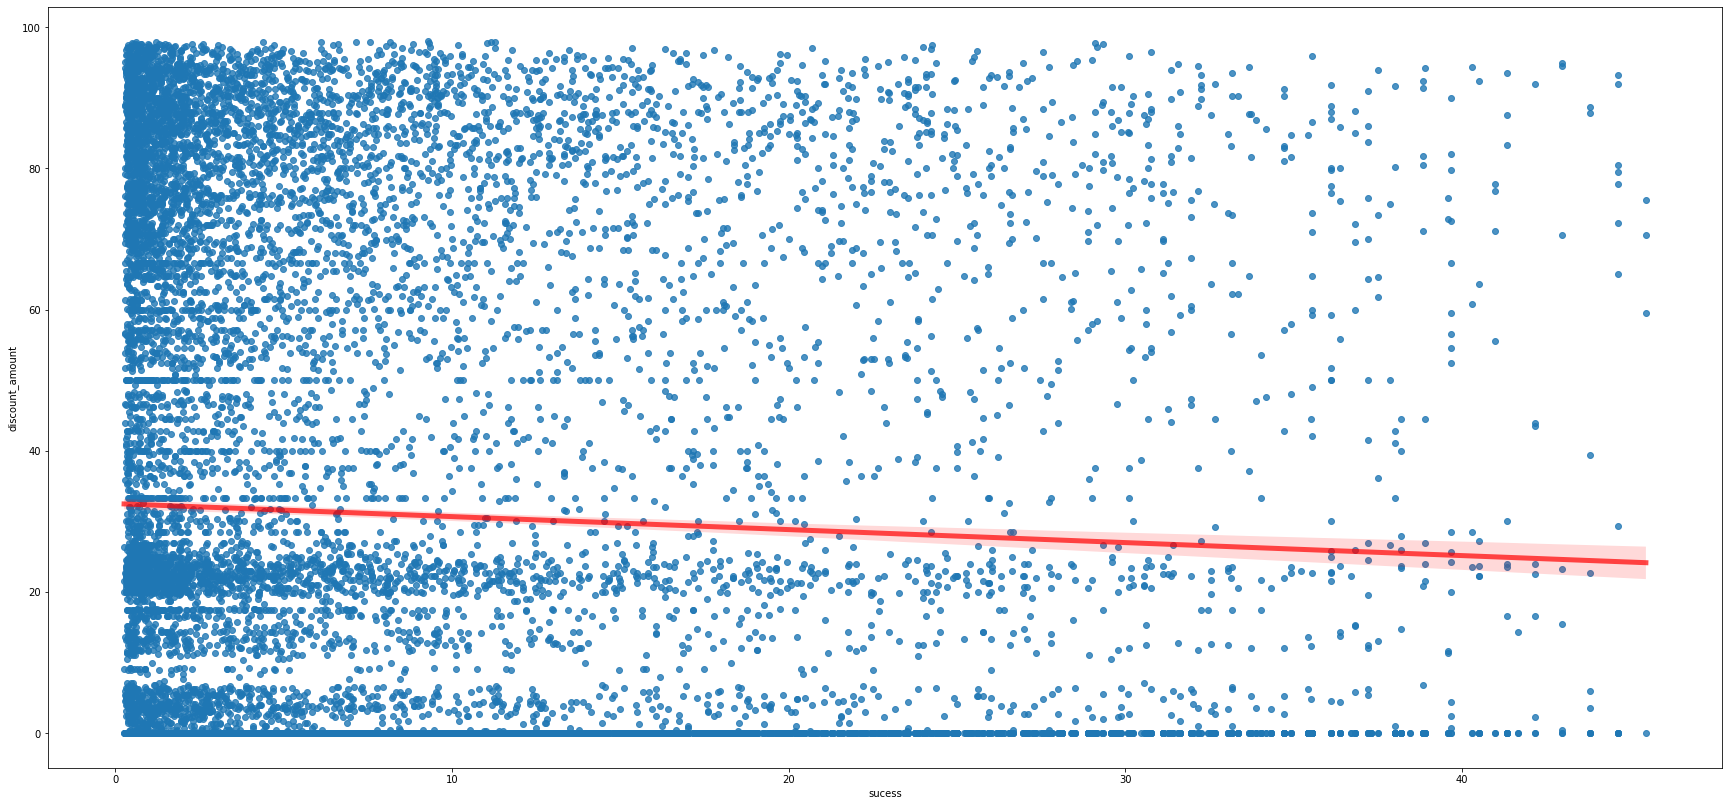

In [ ]:
plt.figure(figsize=(30,14))
sns.regplot(x=df["sucess"], y=df["discount_amount"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Graphique de la proportion des pourcentages de discount. 

On remarque qu'une grande majorité n'en ont pas. Ensuite le % des discounts les plus représentés sont les 20/30% et 80/90++ % . 

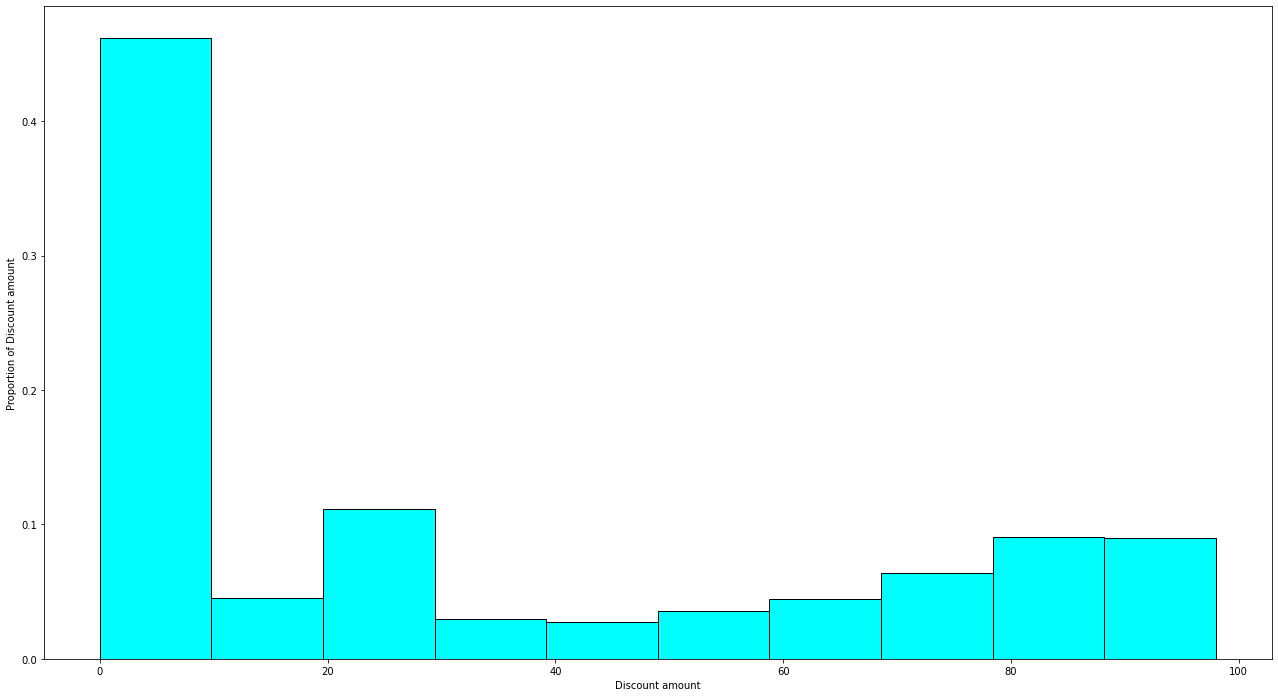

In [ ]:
plt.figure(figsize=(22,12))
weights = np.ones_like(df['discount_amount'])/df['discount_amount'].count()
plt.hist(df['discount_amount'] , bins=10, weights = weights, facecolor = 'cyan',
         edgecolor = 'black', linewidth=1)
plt.xlabel('Discount amount')
plt.ylabel('Proportion of Discount amount')
plt.show()

Graphique de proportion des produits qui ont du succès. 

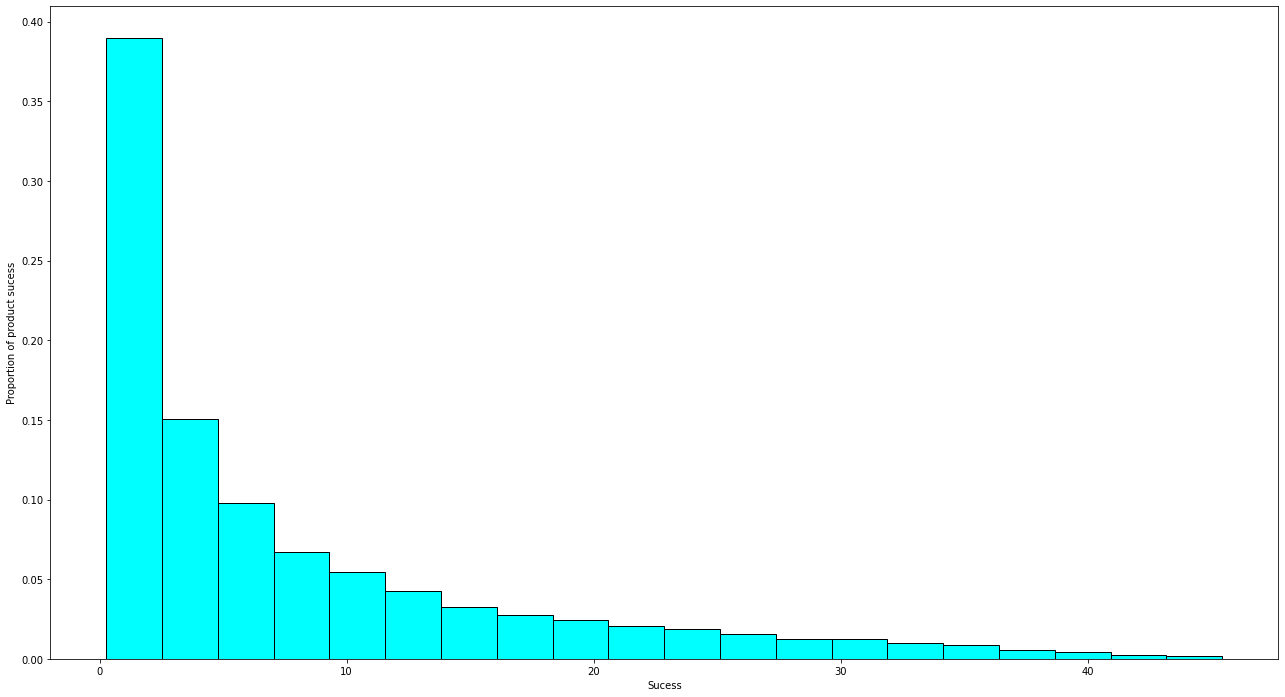

In [ ]:
plt.figure(figsize=(22,12))
weights = np.ones_like(df['sucess'])/df['sucess'].count()
plt.hist(df['sucess'] , bins=20, weights = weights, facecolor = 'cyan',
         edgecolor = 'black', linewidth=1)
plt.xlabel('Sucess')
plt.ylabel('Proportion of product sucess')
plt.show()

In [ ]:
trace1 = go.Violin(y=df["retail_price"],name='retail_price')
trace2 = go.Violin(y=df["discount_price"],name='discount_price')
fig=go.Figure([trace1, trace2])
fig.update_layout(
title='Comparing between retail price and discount price',
yaxis_title='Price')
fig.show()

Pour analyser en un coup d'oeil tout le dataframe, on affiche une heatmap de correlation.

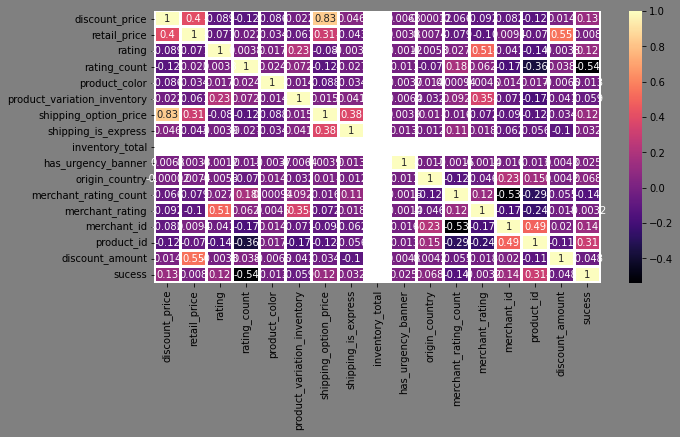

In [ ]:
plt.figure(figsize = [10, 5], clear = True, facecolor = 'grey')
sns.heatmap(df.corr(), annot = True, square = False, linewidths = 2,
            linecolor = "white", cmap = "magma");

On attaque le montage du modèle de ML !Linear Regression.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop(['sucess' ,'title_orig'], axis = 'columns')
y = df.sucess

In [ ]:
X, y = np.array(X), np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
yhat = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)

0.3502631637007677

RidgeCV Regression 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold

In [ ]:
X = df.drop(['title_orig','sucess' ], axis = 'columns')
y = df.sucess
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=42)

In [ ]:

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = Ridge()
model.fit(X_train,y_train)

Ridge()

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,y_pred))

0.3379509057944894


In [ ]:
#define parameters

param = {
    'alpha':[.0001, 0.001,0.01, 0.01,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [ ]:
#define model
model = Ridge()

# define search
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_sc, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.3350581131906625
Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'sag'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



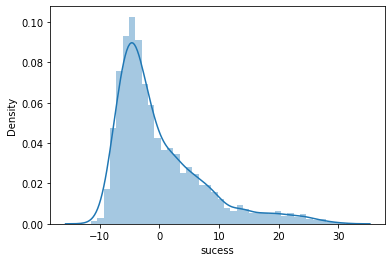

In [ ]:
sns.distplot(y_test-y_pred)

SGD Regressor 

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

In [ ]:
sgdr = SGDRegressor()

In [ ]:
sgdr.fit(X_train, y_train)

score = sgdr.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.3353292669201583


In [ ]:
cv_score = cross_val_score(sgdr, X, y, cv = 5)
print("CV mean score: ", cv_score.mean())

CV mean score:  -2.995645020292272e+31


LassoCV

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
reg = LassoCV(cv=5, random_state=0).fit(X, y)
print(reg.score(X, y))

0.3053615170142908


ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X, y)

ElasticNetCV(cv=5, random_state=0)

In [ ]:
regr.score(X,y)

0.3053600408871675